**Synthetic Data Generator**

Dane pochodzą ze strony: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
Dotychczas zostały przeprowadzone proste testy na generowaniu przy pomocy GMM i KDE, nie patrząc na zależności pomiędzy danymi

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Option to display all columns
pd.set_option('display.max_columns', None)

df = pd.read_csv('heart_uci.csv')

print(df.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


Zamiana z liter na oznaczenia numeryczne

In [4]:
for (columnName, columnData) in df.items():
    if columnData.dtype == object:
        df[columnName] = df[columnName].factorize()[0]

print(df.head())

   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    0              0        140          289          0           0   
1   49    1              1        160          180          0           0   
2   37    0              0        130          283          0           1   
3   48    1              2        138          214          0           0   
4   54    0              1        150          195          0           0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         0             0  
1    156               0      1.0         1             1  
2     98               0      0.0         0             0  
3    108               1      1.5         1             1  
4    122               0      0.0         0             0  


##################################
Budowa modelu

In [5]:
from sklearn.mixture import GaussianMixture

n_components = 16

# Build model
gmm = GaussianMixture(n_components=n_components, covariance_type='full', max_iter=500, n_init=3, verbose=1)
gmm.fit(df)

Initialization 0
  Iteration 10
Initialization converged: True
Initialization 1
  Iteration 10
  Iteration 20
Initialization converged: True
Initialization 2
  Iteration 10
  Iteration 20
  Iteration 30
Initialization converged: True


GaussianMixture(max_iter=500, n_components=16, n_init=3, verbose=1)

In [6]:
gmm_samples = gmm.sample(918)[0]
print(gmm_samples)

[[ 4.55797275e+01  1.04222550e-01  2.59880780e-02 ...  7.23123015e-01
   2.95304280e-01 -8.58880686e-04]
 [ 5.62641162e+01  8.79834541e-01  2.59245603e+00 ...  1.48149416e+00
   8.07166856e-01  2.23451188e-04]
 [ 5.08893623e+01 -1.70863070e-01  1.96835771e+00 ...  1.36692554e+00
   3.92473929e-01 -4.92313462e-04]
 ...
 [ 6.91551308e+01 -4.60477671e-04  6.15572117e-01 ...  2.09969784e+00
   1.13827479e+00  3.91913335e-01]
 [ 5.78340239e+01 -1.00148047e-04  2.36651154e+00 ...  1.40599149e+00
   8.29244951e-01  1.20888060e+00]
 [ 4.95084956e+01  6.85817637e-04  2.09140535e+00 ...  3.06268915e+00
   1.52005023e+00  1.39130298e+00]]


Proste porównanie pojedynczych wartości daje "na oko" dobre wyniki.
Na razie nie przeprowadzono dodatkowych testów i klasyfikacji.

Poniżej podgląd:

In [8]:
# Printing one specific column
column_nb = 0
new_df = []
for row in gmm_samples:
    # Round for expected int
    apnd = np.round(row[column_nb])

    # Exact value
    # apnd = row[column_nb]

    new_df.append(apnd)

new_df = pd.DataFrame({'col': new_df})
print(new_df)

# Age Sex ChestPainType RestingBP Cholesterol FastingBS RestingECG MaxHR ExerciseAngina Oldpeak ST_Slope HeartDisease
#  0   1    2                3       4           5          6       7        8              9     10           11

      col
0    46.0
1    56.0
2    51.0
3    54.0
4    42.0
..    ...
913  59.0
914  43.0
915  69.0
916  58.0
917  50.0

[918 rows x 1 columns]


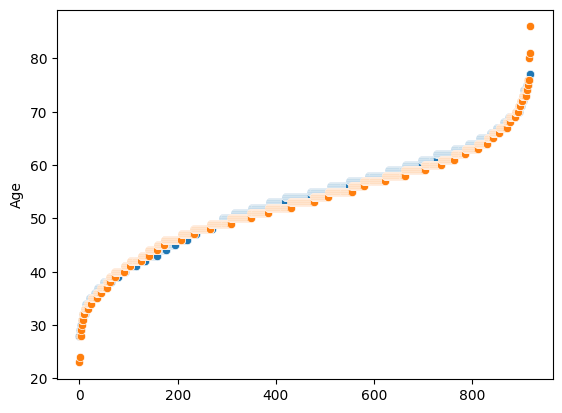

In [9]:
sns.scatterplot(df, x=np.linspace(0, 918, 918), y=df['Age'].sort_values())
sns.scatterplot(new_df, x=np.linspace(0, 918, 918), y=new_df['col'].sort_values())

plt.show()